In [1]:
import json
import pandas as pd
import numpy as np
from tqdm.autonotebook import tqdm
from sklearn import preprocessing
import urllib
import os
import matplotlib.pyplot as plt

/Users/mike/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [87]:
years = range(2000,2020)

In [124]:
dfList = []
weeklenList = []
for y in years:
    rank = pd.read_csv('%s/Ranks.csv'%y,index_col=0)
    rank.columns = ["%s W%s"%(str(y)[-2:],w) for w in rank.columns]
    weeklenList.append(len(rank.columns))
    dfList.append(rank)

In [125]:
fillList = [w + sum(weeklenList[:i]) for i,w in enumerate(weeklenList)]

In [128]:
rank = dfList[0]
rank = rank.join(dfList[1:])

In [139]:
len(fillList)

20

0
2
4
6
8
10
12
14
16
18


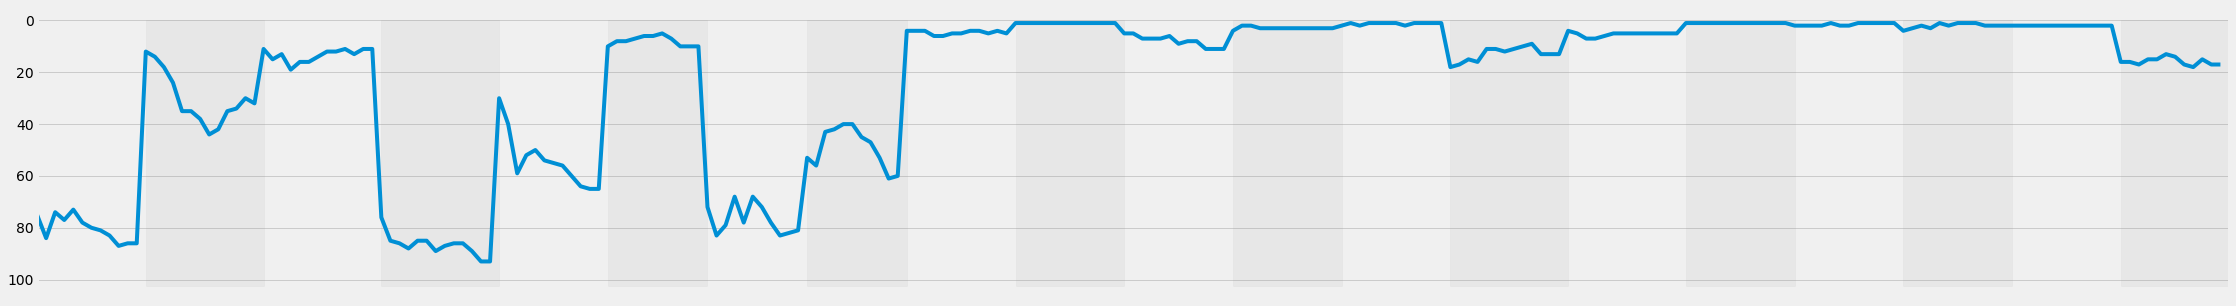

In [144]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(35,5))
plt.gca().invert_yaxis()
plt.margins(x=0)
plt.plot(rank.loc['Alabama'])
plt.xticks([])
for i in range(0,len(fillList),2):
    print(i)
    plt.fill_between(fillList[i:i+2],max(rank.loc['Alabama'])*1.1,alpha=0.1,color='#999999')
# plt.tight_layout()
plt.show()